# Volume 4: Introduction to Initial and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

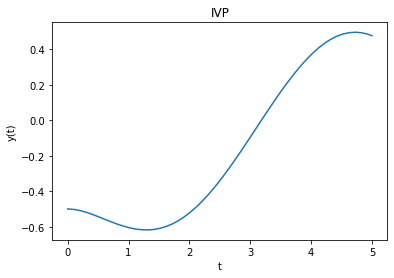

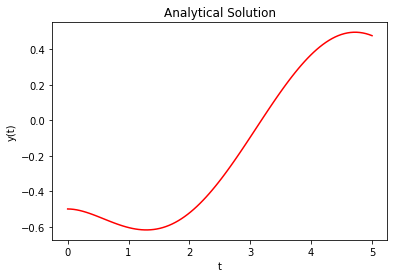

In [2]:
def ode(t,y):
    return np.array([y[1], np.sin(t) + y[0]])    #create our ordinary diff eq
t_span = (0,5)
y_0 = np.array([-1/2, 0])    #create our t span and initial conditions

sol = solve_ivp(ode, t_span, y_0, max_step=.1)    #solve the equation

plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')        #plot our solution
plt.title('IVP')
plt.show()

y = lambda t: -.5*(np.exp(-t)+np.sin(t))   #plot the analytical solution
t = np.linspace(0,5,100)
plt.plot(t, y(t), '-r')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Analytical Solution')
plt.show()
 

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

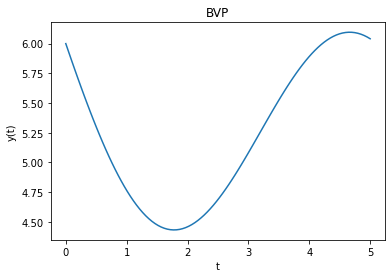

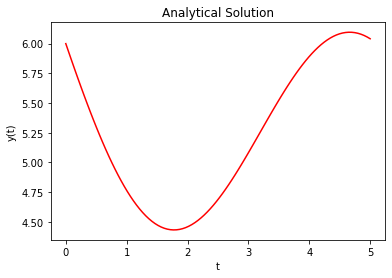

In [3]:
def ode(t,y):
    return np.array([y[1], np.sin(t) - np.cos(t) - .25*np.exp(-.5*t) - y[1]])   #create our ordinary diff eq 

def bc(ya, yb):
    return np.array([ya[0]-6, yb[1]+0.324705])     #create our boundary conditions

t_steps = 100
t = np.linspace(0,5,t_steps)
y0 = np.ones((2, t_steps))    #create our interval

sol = solve_bvp(ode, bc, t, y0)     #solve the bvp
                     
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')     #plot the solution
plt.title('BVP')
plt.show()

y = lambda t: np.exp(-.5*t) - np.sin(t) + 5   #plot the analytical solution
t = np.linspace(0,5,100)
plt.plot(t, y(t), '-r')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Analytical Solution')
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

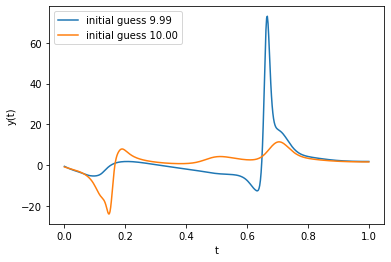

In [4]:
def ode(t,y):
    return np.array([y[1], (1-y[1])*10*y[0]])   #create our ordinary diff eq 

def bc(ya, yb):
    return np.array([ya[0]+1, yb[0]-(3/2)])     #create our boundary conditions

t_steps = 50
t = np.linspace(0,1,t_steps)
guess_1 = 9.99*np.ones((2, t_steps))   #create guess 1
guess_2 = 10*np.ones((2, t_steps))  #create guess 2

sol1 = solve_bvp(ode, bc, t, guess_1)     #solve the bvp with guess 1
sol2 = solve_bvp(ode, bc, t, guess_2)    #solve the bvp with guess 2
                     
plt.plot(sol1.x, sol1.y[0], label='initial guess 9.99')
plt.plot(sol2.x, sol2.y[0], label='initial guess 10.00')
plt.xlabel('t')
plt.ylabel('y(t)')     #plot the solution
plt.legend(loc='upper left')
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

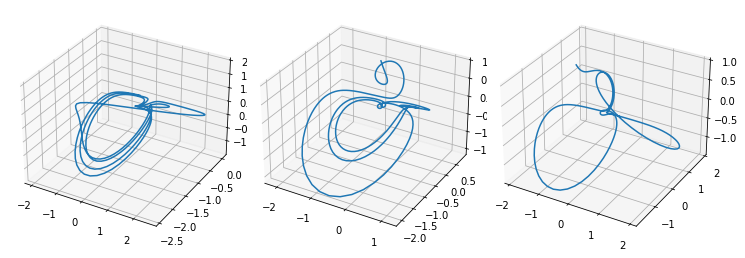

In [5]:
def ode(t,y):
    return np.array([.2*y[0] + y[1]*y[2], .01*y[0] - .4*y[1] - y[0]*y[2], -1*y[2] - y[0]*y[1]])   #create our ordinary diff eq 
t_span = (0,100)

y_0 = np.array([-1/2, 0, 0])    #create our t span and initial conditions
y_1 = np.array([-1/2,0,1])
y_2 = np.array([-1,0,1])

sol1 = solve_ivp(ode, t_span, y_0, max_step=.1)    #solve the equations
sol2 = solve_ivp(ode, t_span, y_1, max_step=.1)
sol3 = solve_ivp(ode, t_span, y_2, max_step=.1)

fig = plt.figure(figsize=((10,7)), constrained_layout=True)       #create our 3 subplots with different ic's 
ax = fig.add_subplot(131, projection='3d')

ax.plot3D(sol1.y[0], sol1.y[1], sol1.y[2])

ax = fig.add_subplot(132, projection='3d')
ax.plot3D(sol2.y[0], sol2.y[1], sol2.y[2])

ax = fig.add_subplot(133, projection='3d')
ax.plot3D(sol3.y[0], sol3.y[1], sol3.y[2])

plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

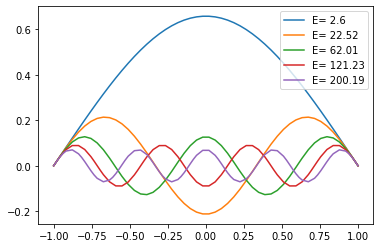

In [17]:
def ode(t,y,p):
    return np.array([y[1], -p[0]*y[0] + (t**2)*y[0]])   #create our ordinary diff eq 

def bcs(ya, yb, p):
    return np.array([ya[0], ya[1]-1, yb[0]])     #create our boundary conditions

t = np.linspace(-1,1,50)      #create our t span and initial guess
y_guess = np.ones((2,50))
    
for val in [2.6, 22.52, 62.01, 121.23, 200.19]:     #graph each different E value
    sol = solve_bvp(ode, bcs, t, y_guess, p=[val])
    plt.plot(sol.x, sol.y[0], label='E= '+str(val))
    
    
plt.legend(loc='upper right')
plt.show()


